In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [3]:
train_dir = 'C:/Users/sande/Desktop/Genai/SIMPLE RNN/Facial images dataset for Autism Detection/train'
valid_dir = 'C:/Users/sande/Desktop/Genai/SIMPLE RNN/Facial images dataset for Autism Detection/valid'
test_dir = 'C:/Users/sande/Desktop/Genai/SIMPLE RNN/Facial images dataset for Autism Detection/test'

In [4]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 2526 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [5]:
# Get class names
class_names = train_ds.class_names
print("Class Names:", class_names)
print("Number of Classes:", len(class_names))

Class Names: ['autistic', 'non_autistic']
Number of Classes: 2


In [6]:
# Prefetch datasets for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
# Create the CNN model
n_classes = len(class_names)
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

c:\Users\sande\Desktop\Genai\env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,870,850 (64.36 MB)

 Trainable params: 16,870,850 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
# Train the CNN model
history = model.fit(
    train_ds,
    epochs=10,  # You can adjust the number of epochs
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 644ms/step - accuracy: 0.5088 - loss: 250.8565 - val_accuracy: 0.5700 - val_loss: 0.7032
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 49s 620ms/step - accuracy: 0.6669 - loss: 0.6118 - val_accuracy: 0.5750 - val_loss: 0.6558
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 636ms/step - accuracy: 0.7429 - loss: 0.5281 - val_accuracy: 0.5800 - val_loss: 0.7608
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 665ms/step - accuracy: 0.7967 - loss: 0.4359 - val_accuracy: 0.5700 - val_loss: 1.0191
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 693ms/step - accuracy: 0.8777 - loss: 0.2962 - val_accuracy: 0.6100 - val_loss: 0.8243
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 779ms/step - accuracy: 0.9386 - loss: 0.1858 - val_accuracy: 0.6050 - val_loss: 1.0124
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 60s 755ms/step - accuracy: 0.9659 - loss: 0.1159 - val_accuracy: 0.6000 - val_loss: 1.1768
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 691ms/step - accuracy: 0.9876 - loss: 0.0490 - val_ac

In [11]:
# Evaluate the model on the test dataset
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.7410 - loss: 1.4982
Test Loss: 1.2659127712249756
Test Accuracy: 0.7649999856948853


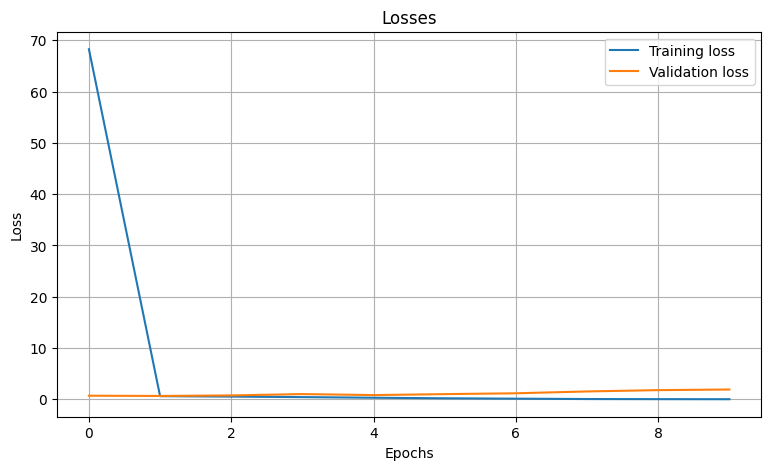

In [15]:
# Plot training history (loss and accuracy)
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Losses")
plt.grid()
plt.legend()

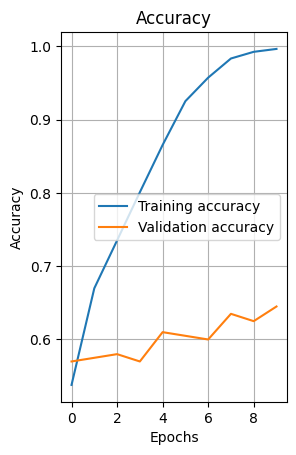

In [16]:
plt.subplot(1, 2, 2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

In [17]:
# Get true labels and predicted labels from the test dataset
true_classes = []
predicted_classes = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))
    true_classes.extend(labels.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


In [18]:
# Convert to numpy arrays for evaluation
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

              precision    recall  f1-score   support

    autistic       0.74      0.81      0.78       100
non_autistic       0.79      0.72      0.75       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



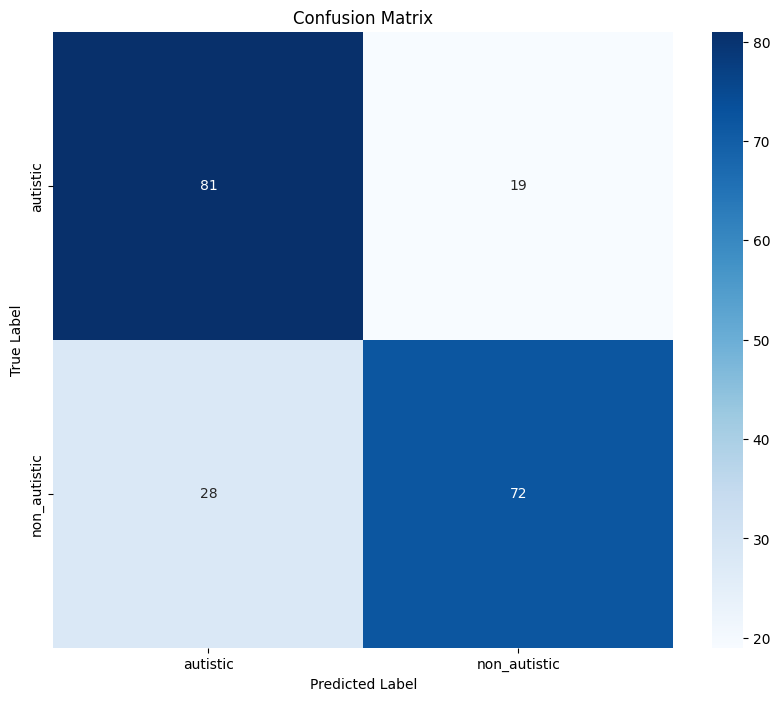

In [19]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Function to make predictions
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


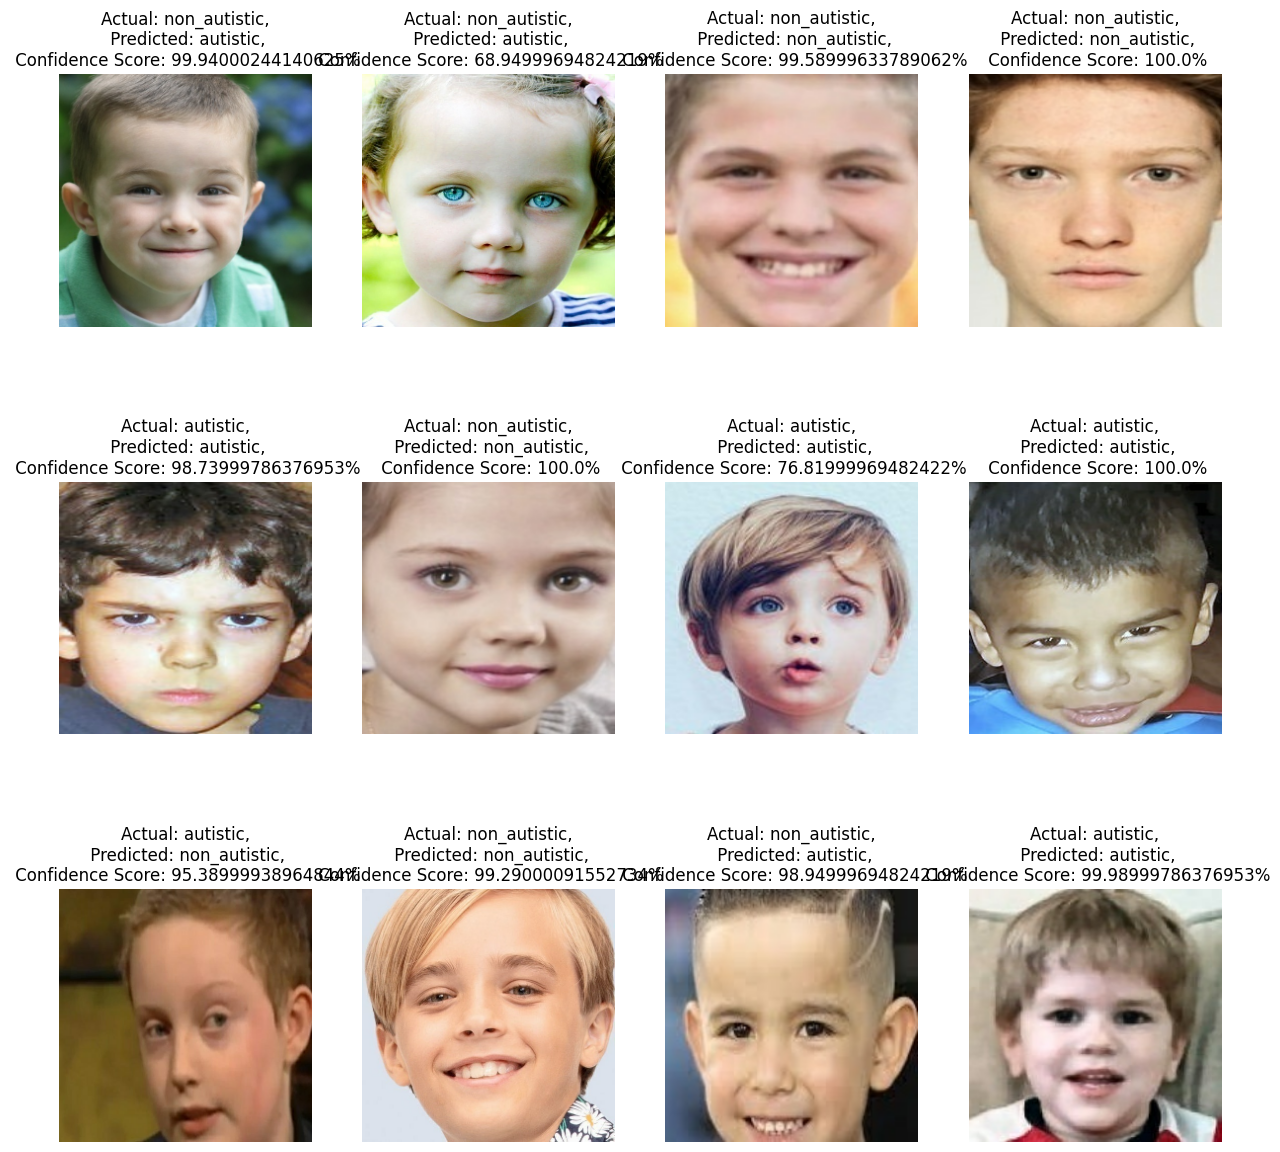

In [21]:
# Visualize predictions on test data
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    num_images = min(12, images.shape[0])  # Ensure we don't go out of bounds
    for i in range(num_images):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Use the prediction function to get predicted class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

In [22]:
model.save("model.h5")


In [23]:
# Save class names (optional)
with open("autism_labels.txt", "w") as f:
    for label in class_names:
        f.write(label + "\n")
